<a href="https://colab.research.google.com/github/Shashwat-spyder/NYC-Taxi-Trip-Time/blob/main/New_York_Taxi_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
#Mounting gdrive
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [279]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from haversine import haversine

In [281]:
nyc_df=pd.read_csv('/content/Drive/My Drive/NYC Taxi Data (1).csv')

In [282]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [283]:
nyc_df.shape

(1458644, 11)

In [284]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [285]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# **Data Cleaning**

Target variable (trip_duration)

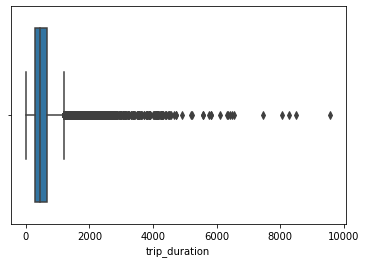

In [361]:
sns.boxplot(nyc_df['trip_duration'])

Clearly there are ouliers in target variable.

In [287]:
nyc_df['trip_duration'].sort_values(ascending=False).head(10)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64

In [362]:
trip_duration_mean = np.mean(nyc_df['trip_duration'])
trip_duration_std = np.std(nyc_df['trip_duration'])
nyc_df = nyc_df[nyc_df['trip_duration']<=trip_duration_mean + 2*trip_duration_std]
nyc_df = nyc_df[nyc_df['trip_duration']>= trip_duration_mean - 2*trip_duration_std]

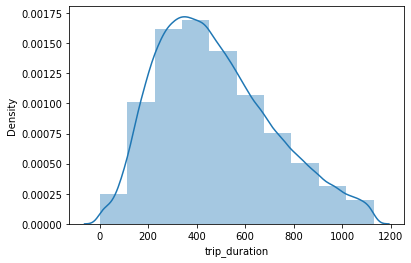

In [363]:
sns.distplot(nyc_df['trip_duration'],bins=10)

In [293]:
# sns.distplot(np.log10(nyc_df['trip_duration']),bins=10)

In [294]:
# log=np.log10(nyc_df['trip_duration'].skew())
# print(log)
# non_log=nyc_df['trip_duration'].skew()
# print(non_log)

passenger_count

In [295]:
nyc_df['passenger_count'].sort_values(ascending=True)

1101359    0
1293792    0
136519     0
827485     0
722399     0
          ..
824904     7
433304     7
489613     7
826064     8
436047     9
Name: passenger_count, Length: 1456540, dtype: int64

In [296]:

nyc_df[nyc_df['passenger_count']==0]['passenger_count'].count()

59

In [297]:
nyc_df['passenger_count'].value_counts()

1    1032274
2     210008
5      77869
3      59777
6      48200
4      28348
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

We can see some null/ zero values and some least occured passenger counts.

In [298]:
#Drop such observations
nyc_df.drop(nyc_df[nyc_df['passenger_count'] >=7].index, inplace = True)
nyc_df.drop(nyc_df[nyc_df['passenger_count'] ==0].index, inplace = True)

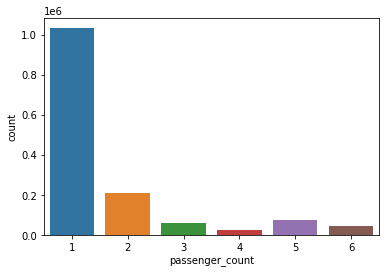

In [299]:
sns.countplot(x='passenger_count', data=nyc_df)

For New York city:

Latitude is between 40.7128 and 40.748817 Longitude is between - 74.0059 and - 73.968285

In [300]:
print('minimum pickup latitude in dataset' , nyc_df['pickup_latitude'].min())
print('minimum pickup longitude in dataset' , nyc_df['pickup_longitude'].min())

minimum pickup latitude in dataset 34.35969543457031
minimum pickup longitude in dataset -121.93334197998048


Lets do some operatios on dropoff and pickup longitude,latitudes to get them under the values respective to new york city.

In [301]:
nyc_df=nyc_df[nyc_df['pickup_latitude']>=40.7128]
nyc_df=nyc_df[nyc_df['pickup_latitude']<=40.748817]
nyc_df=nyc_df[nyc_df['dropoff_latitude']>=40.7128]
nyc_df=nyc_df[nyc_df['dropoff_latitude']<=40.748817]
nyc_df=nyc_df[nyc_df['pickup_longitude']>=-74.0059]
nyc_df=nyc_df[nyc_df['pickup_longitude']<=-73.968285]
nyc_df=nyc_df[nyc_df['dropoff_longitude']<=-73.968285]
nyc_df=nyc_df[nyc_df['dropoff_longitude']>=-74.0059]
nyc_df.shape

(189681, 11)

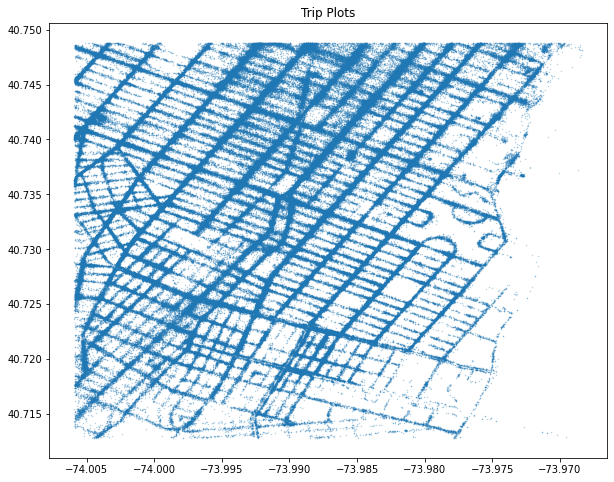

In [302]:
longitude = list(nyc_df.pickup_longitude) + list(nyc_df.dropoff_longitude)
latitude = list(nyc_df.pickup_latitude) + list(nyc_df.dropoff_latitude)
plt.figure(figsize = (10,8))
plt.plot(longitude,latitude,'.',alpha = .40, markersize = .8)
plt.title('Trip Plots')
plt.show()

In [303]:
nyc_df['trip_duration']

1          663
8          255
17         731
19         251
37         277
          ... 
1458618    367
1458623    554
1458628    351
1458630    549
1458639    778
Name: trip_duration, Length: 189681, dtype: int64

## **EDA**

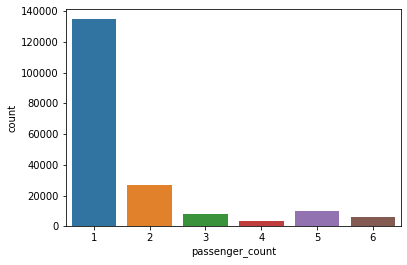

In [304]:
sns.countplot(x='passenger_count', data=nyc_df)

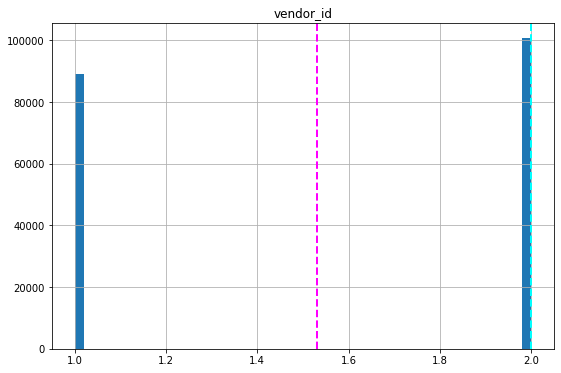

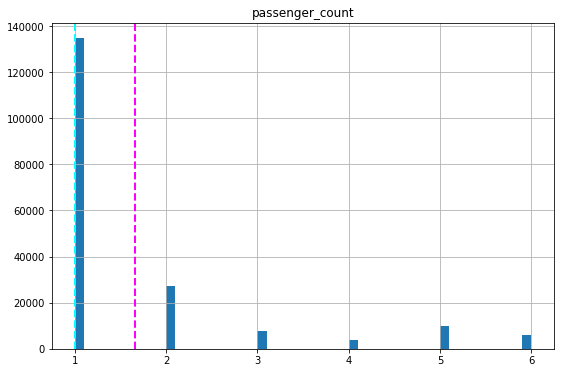

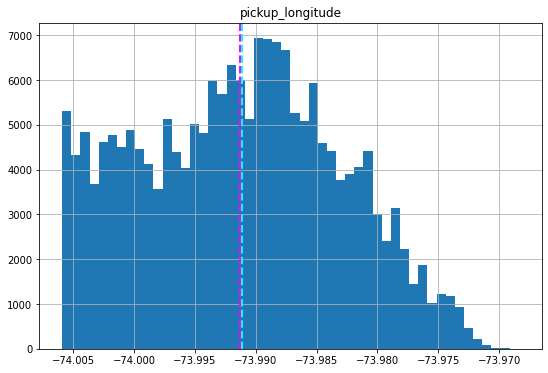

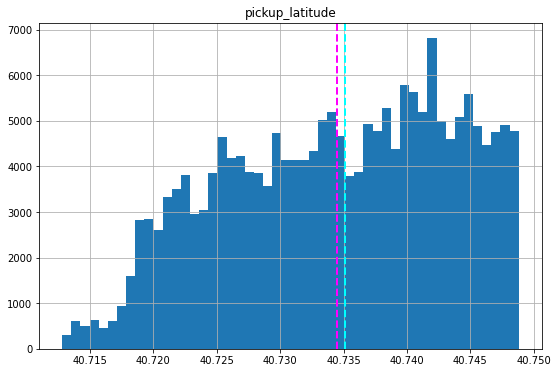

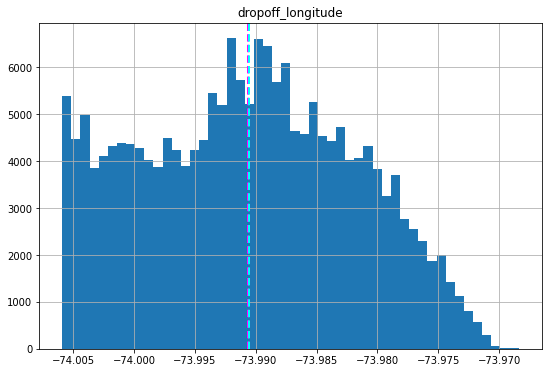

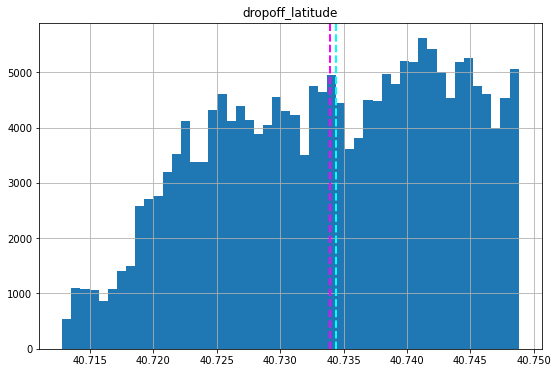

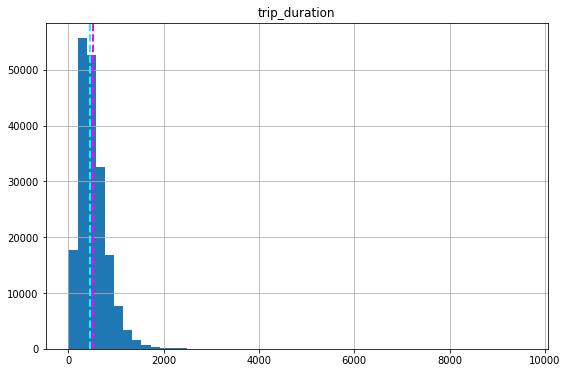

In [305]:
numeric_features=nyc_df.describe().columns

for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=nyc_df[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

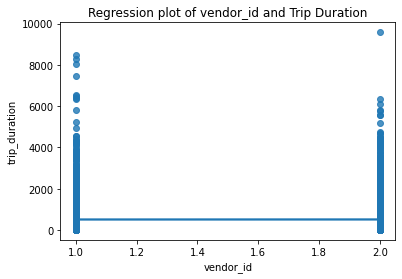

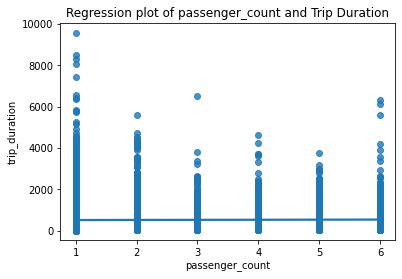

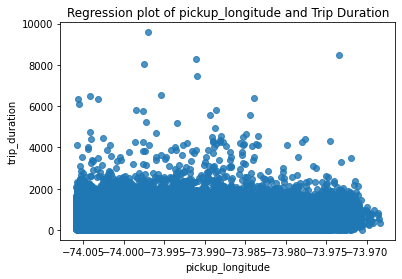

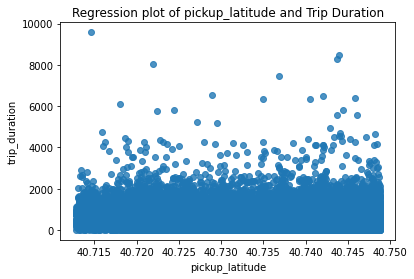

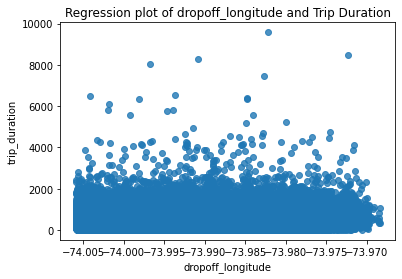

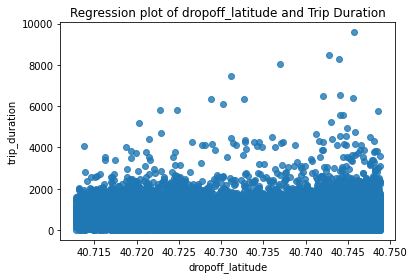

In [306]:
for var in numeric_features[0:-1]:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='trip_duration', data=nyc_df, ci=None).set(title=f'Regression plot of {var} and Trip Duration')

We can see from above passenger count, pickup_longitude,pickup_latitude, dropoff_longitude, dropoff_lattitude has little or no correlation
 with target variable.

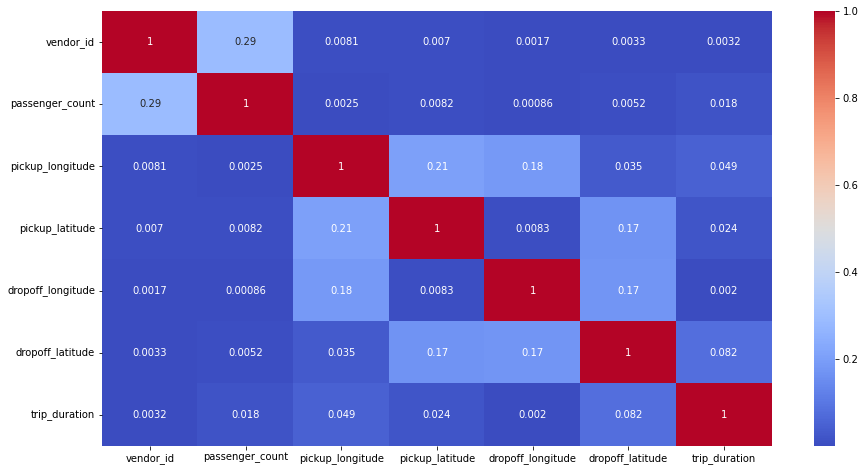

In [307]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = nyc_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [308]:
def distance(lat1,long1,lat2,long2):
  '''Function to find sperical distance from one point to another
  lat- longitude
  long-longitude
  1-pickup location
  2-dropoff location
  '''
  distance = haversine((lat1,long1),(lat2,long1))+haversine((lat1,long1),(lat1,long2))
  return distance

In [309]:
nyc_df["distance"] = nyc_df.apply(lambda row: distance(row.pickup_latitude, row.pickup_longitude,row.dropoff_latitude,row.dropoff_longitude), axis=1)

In [310]:
nyc_df["speed"] = (nyc_df["distance"]) / ((nyc_df["trip_duration"])/3600)

In [311]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.430509,13.197336
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,1.774807,25.056097
17,id1154431,1,2016-04-14 08:48:26,2016-04-14 09:00:37,1,-73.994255,40.745804,-73.999657,40.723343,N,731,2.952593,14.540812
19,id3390316,2,2016-06-05 13:47:23,2016-06-05 13:51:34,1,-73.983887,40.738197,-73.991203,40.727871,N,251,1.764684,25.310206
37,id2403238,1,2016-06-23 23:00:09,2016-06-23 23:04:46,1,-73.988068,40.728081,-73.980751,40.721470,N,277,1.351631,17.566318


In [312]:
nyc_df['trip_duration'].sort_values(ascending=False)

130934     9581
354686     8496
938685     8297
1157479    8055
1156446    7459
           ... 
1382872       1
918415        1
761666        1
1360664       1
285635        1
Name: trip_duration, Length: 189681, dtype: int64

In [313]:
nyc_df['trip_duration'].max()

9581

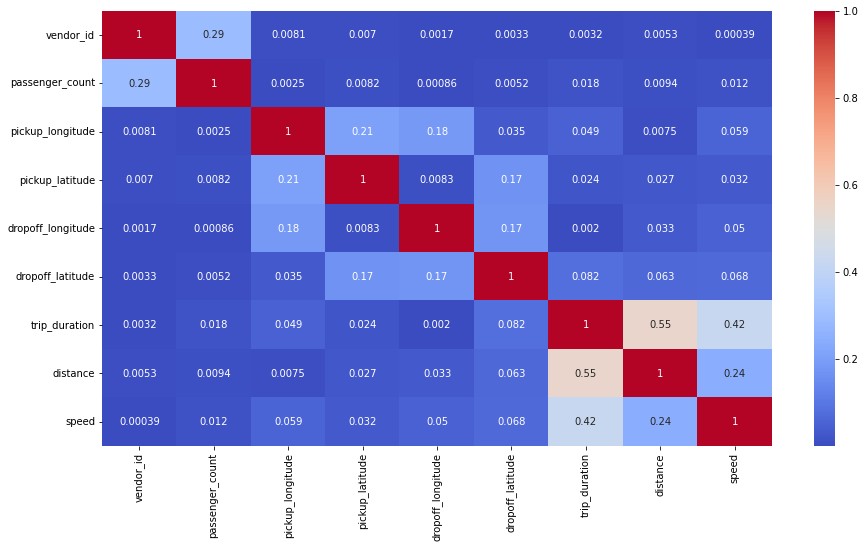

In [314]:
plt.figure(figsize=(15,8))
correlation = nyc_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [315]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [316]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i not in ['trip_duration']]])

,variables,VIF
0,vendor_id,1.138168e+01
1,passenger_count,2.852687e+00
2,pickup_longitude,5.528498e+07
3,pickup_latitude,1.936659e+07
4,dropoff_longitude,5.500812e+07
5,dropoff_latitude,1.861323e+07
6,distance,5.181276e+00
7,speed,5.264312e+00


In [317]:
calc_vif(nyc_df[[i for i in nyc_df.describe().columns if i not in ['trip_duration','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]])

,variables,VIF
0,vendor_id,5.973637
1,passenger_count,2.826190
2,distance,4.424223
3,speed,4.465716


In [318]:
numerical_features=['vendor_id','passenger_count','distance','speed']

In [319]:
nyc_df.drop('id',inplace=True, axis=1)

In [320]:
categorical_features = nyc_df.describe(include=['object','category']).columns

In [321]:
categorical_features

Index(['pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

In [322]:
nyc_df['pickup_datetime']

1          2016-06-12 00:43:35
8          2016-05-27 23:12:23
17         2016-04-14 08:48:26
19         2016-06-05 13:47:23
37         2016-06-23 23:00:09
                  ...         
1458618    2016-04-17 01:46:48
1458623    2016-01-18 20:35:30
1458628    2016-05-30 03:08:19
1458630    2016-06-25 03:44:32
1458639    2016-04-08 13:31:04
Name: pickup_datetime, Length: 189681, dtype: object

In [323]:
# Delimit pickup_datetime variable 
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

nyc_df['pickup_date'] = nyc_df['pickup_datetime'].dt.date # Extract date
nyc_df['pickup_time'] = nyc_df['pickup_datetime'].dt.time # Extract time

# Delimit dropoff_datetime variables
nyc_df['dropoff_date'] = nyc_df['dropoff_datetime'].dt.date # Extract date
nyc_df['dropoff_time'] = nyc_df['dropoff_datetime'].dt.time # Extract time

# Additional pickup features
nyc_df['pickup_month'] = nyc_df['pickup_datetime'].dt.month # Extract month
nyc_df['pickup_hour'] = nyc_df['pickup_datetime'].dt.hour # Extract hour
nyc_df['pickup_weekday'] = nyc_df['pickup_datetime'].dt.dayofweek # Extract day name

# Drop concatentated timestamp columns
nyc_df.drop(['pickup_datetime'], axis = 1, inplace = True)
nyc_df.drop(['dropoff_datetime'], axis = 1, inplace = True)

# Confirm changes
nyc_df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'speed', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday'],
      dtype='object')

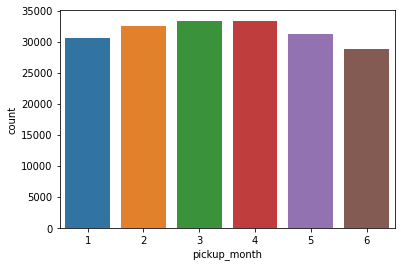

In [324]:
# plt.bar(nyc_df['pickup_month'],height=5)
sns.countplot(x='pickup_month', data=nyc_df)

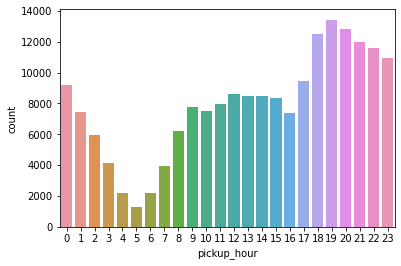

In [325]:
sns.countplot(x='pickup_hour', data=nyc_df)

In [326]:
nyc_df['pickup_weekday']

1          6
8          4
17         3
19         6
37         3
          ..
1458618    6
1458623    0
1458628    0
1458630    5
1458639    4
Name: pickup_weekday, Length: 189681, dtype: int64

In [327]:
nyc_df['store_and_fwd_flag'] = nyc_df['store_and_fwd_flag'].map({'N':0,'Y':1})

In [328]:
categorical_features

Index(['pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

In [329]:
numerical_features

['vendor_id', 'passenger_count', 'distance', 'speed']

In [330]:
type(nyc_df.iloc[0]['pickup_weekday'])

numpy.int64

In [331]:
nyc_df['pickup_latitude'].max()

40.74881362915039

In [332]:
nyc_df[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag','pickup_month', 'pickup_hour',
       'pickup_weekday','trip_duration','speed','distance']].corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,pickup_hour,pickup_weekday,trip_duration,speed,distance
vendor_id,1.000000,0.291393,0.008073,0.006960,0.001738,0.003267,-0.069905,-0.009424,0.008555,0.000356,0.003159,-0.000386,-0.005271
passenger_count,0.291393,1.000000,-0.002469,-0.008233,-0.000865,-0.005237,-0.023261,-0.003416,-0.000846,0.027282,0.018474,-0.012132,0.009428
pickup_longitude,0.008073,-0.002469,1.000000,0.205412,0.184638,0.034933,0.004228,-0.003429,-0.010481,-0.001954,-0.048556,0.058639,-0.007516
pickup_latitude,0.006960,-0.008233,0.205412,1.000000,0.008340,0.170094,0.002288,0.003239,0.062334,-0.077177,-0.023654,0.032319,-0.027466
dropoff_longitude,0.001738,-0.000865,0.184638,0.008340,1.000000,0.173698,0.002252,-0.007269,-0.019159,0.003263,-0.002026,0.049620,0.033110
dropoff_latitude,0.003267,-0.005237,0.034933,0.170094,0.173698,1.000000,-0.001606,0.002436,-0.018808,-0.042174,-0.081938,0.068492,-0.062930
store_and_fwd_flag,-0.069905,-0.023261,0.004228,0.002288,0.002252,-0.001606,1.000000,0.000820,-0.004861,-0.001370,0.005022,-0.004052,0.003109
pickup_month,-0.009424,-0.003416,-0.003429,0.003239,-0.007269,0.002436,0.000820,1.000000,-0.007179,-0.026884,0.036376,-0.014331,0.014170
pickup_hour,0.008555,-0.000846,-0.010481,0.062334,-0.019159,-0.018808,-0.004861,-0.007179,1.000000,-0.154921,0.081259,-0.106184,0.012461
pickup_weekday,0.000356,0.027282,-0.001954,-0.077177,0.003263,-0.042174,-0.001370,-0.026884,-0.154921,1.000000,0.025505,0.004798,0.033406


In [333]:
nyc_df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'speed', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday'],
      dtype='object')

In [351]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X =nyc_df[['distance','speed']]

In [352]:
nyc_df['trip_duration'].max()

9581

In [336]:
# y = np.log10(nyc_df['trip_duration'])
y = nyc_df['trip_duration']

In [353]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(151744, 2)
(37937, 2)


In [354]:
reg = LinearRegression().fit(X_train, y_train)

In [355]:
reg.score(X_train, y_train)

0.634186786872364

In [356]:
reg.coef_

array([234.47624898, -25.21351428])

In [357]:
reg.intercept_

456.56112571598374

In [358]:
y_pred = reg.predict(X_test)

In [359]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 34842.61332605849
RMSE : 186.66176182083595


In [360]:
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Linear Regression Performance Metrics
R^2= 0.6258046553277912
MAE: 100.23200667378903
MSE: 34842.61332605849
RMSE: 186.66176182083595


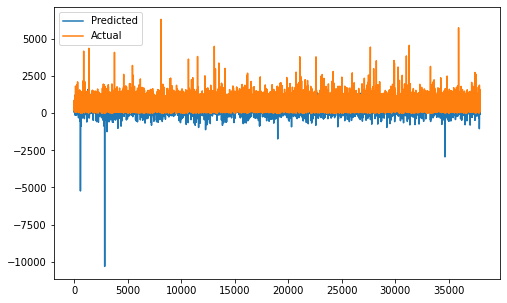

In [345]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**Implementing Ridge Regression model**

In [346]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [347]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  -35361.79169269773


In [348]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [349]:
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_ridge))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))


Linear Regression Performance Metrics
R^2= 0.6259108219472658
MAE: 100.23536995726747
MSE: 34832.74496930181
RMSE: 186.6353261558535


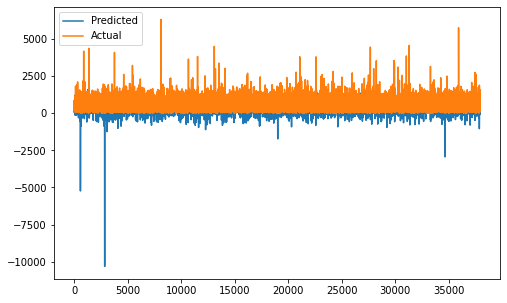

In [350]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()